## **Task 3 - To Explore Unsupervised Machine Learning <br/>**
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

**Importing libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

**Loading iris dataset**


In [10]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Selecting the features
iris_values = iris_df.iloc[:, [0, 1, 2, 3]].values

**Finding optimal number of clusters (k-value) using Elbow method**

In [7]:
#creating a blank list
Sum_of_squared_distances = []

#range of k means value to be tested
K = range(1,15)

# For each K value, we will initialise k-means and use the inertia attribute 
# to identify the sum of squared distances of samples to the nearest cluster centre.
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_values)
    Sum_of_squared_distances.append(km.inertia_)



**Plotting output graph of the Elbow method**

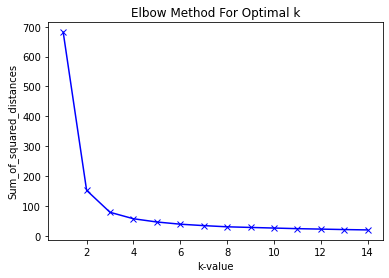

In [9]:
#Plotting the sum of squared distances for k in the range
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k-value')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**The shape of elbow is approximately formed at k=3**
**Therefore, Implementing k-means clustering using k=3**

In [12]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(iris_values)
print(y_kmeans)

kmeans.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

**Visualizing the clustering using scatter plot**

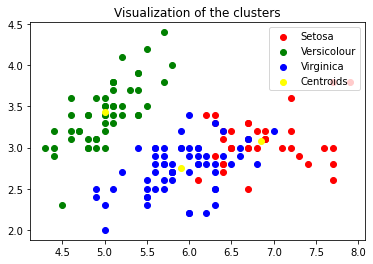

In [32]:
#Plotting the clusters
plt.scatter(iris_values[y_kmeans == 0, 0], iris_values[y_kmeans == 0, 1],label = "Setosa", c = 'red')
plt.scatter(iris_values[y_kmeans == 1, 0], iris_values[y_kmeans == 1, 1], c = 'green', label = "Versicolour")
plt.scatter(iris_values[y_kmeans == 2, 0], iris_values[y_kmeans == 2, 1], c = 'blue', label = "Virginica")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],c = 'yellow', label = 'Centroids')

plt.title('Visualization of the clusters')
plt.legend(loc="upper right")